<a href="https://colab.research.google.com/github/felipequinto/Series_temporais_TCC/blob/main/Exploration_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessamento de Dados

### Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# semente inicial
seed = 10
import random
np.random.seed(seed)
random.seed(seed)
import tensorflow
tensorflow.random.set_seed(seed)

### Importando a base de dados

In [ ]:
df = pd.read_excel("df.xlsx")

In [ ]:
# Converte os nomes das colunas para strings
df.columns = df.columns.astype(str)

In [ ]:
df.head()

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
0,2018,1,5.374127e+07,5906414.43,50696.18,3168486.01,6458.9,583325.63,82950.58,881.31,...,643303.97,0.0,42021.00,397621.11,436.13,18669.00,12828.98,0.00,0.0,0
1,2018,2,6.643437e+07,6315178.74,60144.70,730433.51,9227.0,559751.51,30982.78,2487.57,...,1321919.90,0.0,221.00,3049390.18,627.19,0.00,26629.37,0.00,0.0,0
2,2018,3,9.245592e+07,6328579.51,59968.33,978174.27,9227.0,625780.82,53689.57,3149.16,...,2133666.55,0.0,90120.00,1988535.08,100.80,23336.04,13739.47,8878.77,0.0,0
3,2018,4,1.716713e+08,6543779.23,60494.86,853728.88,0.0,598860.32,35190.27,3244.84,...,567036.15,0.0,1285864.36,6125397.66,5048.27,1555.68,65466.50,0.00,0.0,0
4,2018,5,6.793400e+07,7106888.05,63273.68,1057232.06,0.0,701784.14,40353.27,3235.61,...,774500.00,0.0,69562.00,8107928.05,6762.80,1555.68,0.00,0.00,0.0,0


### Verificando os dados

In [ ]:
# Verificando dados faltantes
df.isnull().sum()

,0
Ano,0
Mês,0
Total Mês,0
311110101,0
311110103,0
311110105,0
311110106,0
311110107,0
311110108,0
311110109,0


In [ ]:
# Visualizando estatíticas básicas
df.describe()

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
count,27.000000,27.000000,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,...,2.700000e+01,27.000000,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000
mean,2018.666667,6.000000,1.740864e+08,9.532332e+06,76668.463704,1.282922e+06,19086.160000,1.674128e+06,64649.523333,3544.222963,...,2.788516e+06,81661.777778,2.752585e+05,6.522943e+06,7375.250000,5.032068e+04,4394.974815,3.995277e+05,56554.864444,38.888889
std,0.679366,3.626823,1.904523e+08,4.234389e+06,11333.325301,4.376370e+05,19941.516399,4.357277e+06,23998.017419,2247.117684,...,1.829165e+06,200825.122162,3.489868e+05,3.567147e+06,12958.867487,2.381176e+05,13625.224112,1.096635e+06,118645.912825,202.072594
min,2018.000000,1.000000,5.374127e+07,5.906414e+06,50696.180000,7.304335e+05,0.000000,5.597515e+05,25978.790000,881.310000,...,5.670362e+05,0.000000,2.210000e+02,3.976211e+05,100.800000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,2018.000000,3.000000,9.899374e+07,8.131554e+06,70062.920000,1.095770e+06,4138.715000,7.920553e+05,45194.440000,3075.745000,...,1.279100e+06,0.000000,9.208760e+04,4.475885e+06,402.290000,1.555680e+03,0.000000,2.062275e+03,0.000000,0.000000
50%,2019.000000,6.000000,1.308408e+08,9.127351e+06,79459.780000,1.242359e+06,9530.210000,8.537082e+05,61360.470000,3294.610000,...,2.326000e+06,0.000000,1.729841e+05,6.270063e+06,892.140000,1.555680e+03,0.000000,6.222070e+03,3133.330000,0.000000
75%,2019.000000,9.000000,1.703015e+08,9.715138e+06,83838.980000,1.320191e+06,33526.000000,9.036341e+05,81106.865000,3422.895000,...,3.823070e+06,12778.000000,2.007630e+05,7.961275e+06,6638.035000,2.333520e+03,0.000000,6.040235e+04,32734.340000,0.000000
max,2020.000000,12.000000,1.071941e+09,2.958853e+07,107634.660000,3.168486e+06,72679.100000,2.346484e+07,119852.920000,10856.200000,...,7.584973e+06,781099.500000,1.390921e+06,1.809582e+07,55211.130000,1.241279e+06,65466.500000,4.318924e+06,450719.000000,1050.000000


Analisando a correlação das colunas

In [ ]:
# Calcula a matriz de correlação
corr_matrix = df.corr()

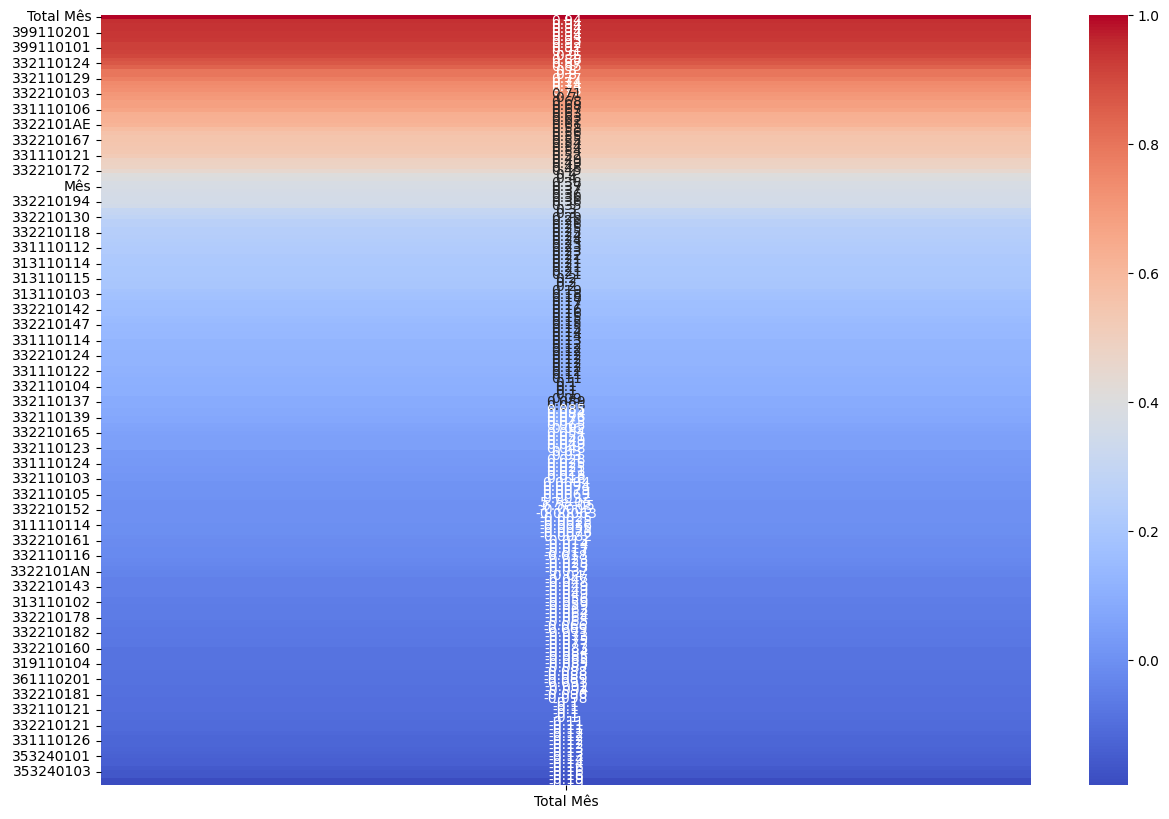

In [ ]:
# Visualização correlação com a coluna alvo 'Total Mês'
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[['Total Mês']].sort_values(by='Total Mês', ascending=False), annot=True, cmap='coolwarm')
plt.show()

Análise do Mapa de Calor da Correlação

Com base no mapa de calor, foi possível fazer as seguintes observações sobre a correlação das colunas com a coluna alvo 'Total Mês':

1. **Alta Correlação Positiva**:
   - As colunas no topo do mapa de calor apresentam alta correlação positiva com a coluna 'Total Mês'. As colunas mais correlacionadas são:
     - **399110201**
     - **399110101**
     - **332110124**
     - **332110129**
     - **332210103**

   Essas colunas têm um coeficiente de correlação próximo de 1, indicando uma forte relação linear positiva com o 'Total Mês'. Isso significa que, à medida que os valores nessas colunas aumentam, o valor do 'Total Mês' também tende a aumentar.

2. **Correlação Moderada a Baixa**:
   - As colunas que aparecem na região intermediária do mapa de calor têm uma correlação moderada a baixa com 'Total Mês'. Essas colunas ainda podem ter algum impacto, mas não tão significativo quanto as colunas do topo.

3. **Correlação Baixa ou Negativa**:
   - As colunas na parte inferior do mapa de calor apresentam correlação baixa ou negativa com 'Total Mês'. Isso significa que essas colunas têm pouca ou nenhuma relação linear com 'Total Mês', ou uma relação inversa onde o aumento nos valores dessas colunas está associado à diminuição no 'Total Mês'.

Colunas com Maior Correlação
Com base na análise do mapa de calor, as colunas mais importantes para a previsão da despesa total são as que apresentam alta correlação positiva.

1. **399110201**
2. **399110101**
3. **332110124**
4. **332110129**
5. **332210103**


Usando um modelo de RandomForest para identificar a importância das variáveis.

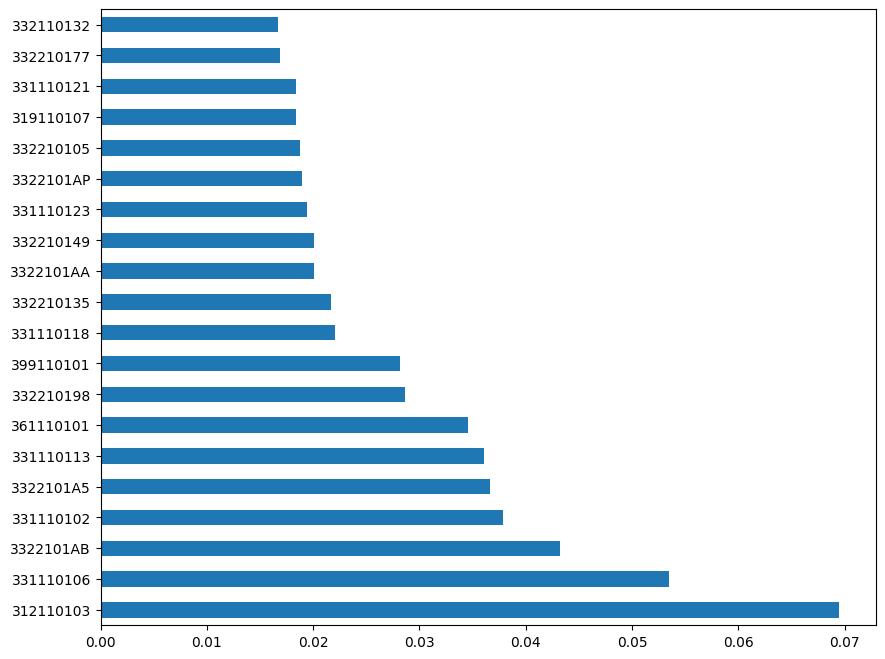

In [ ]:
# Separando as features (X) e o target (y)
X = df.drop(['Total Mês', 'Ano', 'Mês'], axis=1)
y = df['Total Mês']

# Treinamento do modelo
model = RandomForestRegressor()
model.fit(X, y)

# Visualizando a importância das features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
plt.show()

Análise do Gráfico de Importância das Features

Com base no gráfico, podemos fazer algumas observações sobre a importância das características na previsão da coluna 'Total Mês':

1. **Colunas Importantes**:
   - **312110103** **331110106** e **332210AB**: Indica que essas colunas tem uma forte influência na previsão das despesas mensais.
   
2. **Outras Colunas Relevantes**:
   - Colunas como **331110102**, **331110113**, **361110101**, **332210198**, também são importantes, mas com uma influência um pouco menor comparada às principais.

3. **Menor Importância**:
   - Colunas como **332110132**, **332210177**, **331110121**, etc., têm menor importância relativa, mas ainda contribuem significativamente para o modelo.


Utilizando RFE(Recursive Feature Elimination) técnica de seleção de características utilizada para escolher as 5 variáveis mais importantes para o modelo.

In [ ]:
# Separando as features (X) e o target (y)
X = df.drop(['Total Mês', 'Ano', 'Mês'], axis=1)
y = df['Total Mês']

# Convertendo os nomes das colunas para strings
X.columns = X.columns.astype(str)

# Criando o modelo de base
model = LinearRegression()

# Criando o seletor RFE para selecionar 5 colunas
rfe = RFE(model, n_features_to_select=5)

# Ajustar o RFE com os dados
fit = rfe.fit(X, y)

# Visualizando as features selecionadas
selected_features = X.columns[fit.support_]
print("Selected features by RFE:", selected_features)


Selected features by RFE: Index(['311110107', '313110114', '332210105', '332210177', '362110101'], dtype='object')


Visualizando Estatísticas Descritivas das Colunas Selecionadas

In [ ]:
# Estatísticas descritivas
selected_features_df = df[selected_features]
print(selected_features_df.describe())


          311110107     313110114     332210105     332210177     362110101
count  2.700000e+01  2.700000e+01  2.700000e+01  2.700000e+01  2.700000e+01
mean   1.674128e+06  2.092352e+06  1.056783e+06  2.263043e+05  8.263583e+05
std    4.357277e+06  4.760227e+05  2.475994e+06  5.590510e+05  4.293884e+06
min    5.597515e+05  1.223406e+06  9.917270e+04  0.000000e+00  0.000000e+00
25%    7.920553e+05  1.797409e+06  3.258292e+05  1.458550e+02  0.000000e+00
50%    8.537082e+05  2.210003e+06  4.687366e+05  1.591334e+04  0.000000e+00
75%    9.036341e+05  2.487419e+06  7.411916e+05  1.348711e+05  0.000000e+00
max    2.346484e+07  2.772407e+06  1.326137e+07  2.740000e+06  2.231167e+07


Análise das Estatísticas Descritivas das Colunas Selecionadas

1. **311110107**:
   - Apresenta uma grande variação nos valores, com uma média alta e um desvio padrão considerável, indicando que os valores podem variar significativamente.

2. **313110114**:
    - Similar à coluna anterior, esta coluna também apresenta uma grande variação nos valores, com uma média e um desvio padrão altos.

3. **332210105**:
    - Média mais baixa que as anteriores, mas ainda apresenta uma variação significativa nos valores.

4. **332210177** **362110101**:
    - Média e um desvio padrão menores, mas ainda assim mostra uma variação considerável, com valores que chegam a zero.

Conclusões Iniciais
- **Variação Significativa**: Todas as colunas apresentam uma variação significativa nos valores, com grandes diferenças entre os valores mínimo e máximo.
- **Valores Nulos ou Zeros**: Algumas colunas têm valores que chegam a zero, o que pode indicar períodos sem despesas registradas para essas categorias.
- **Desvio Padrão Alto**: O desvio padrão alto em todas as colunas sugere que os valores das despesas são bastante dispersos.

Visualizar Exemplos de Dados

In [ ]:
# Visualizar os primeiros 5 exemplos de dados das colunas selecionadas
print(selected_features_df.head())


   311110107   313110114  332210105  332210177  362110101
0  583325.63  1250022.41  233830.39      325.0        0.0
1  559751.51  1223406.39   99172.70        0.0        0.0
2  625780.82  1275146.79  243623.46     8100.0        0.0
3  598860.32  1298934.75  530218.89        0.0        0.0
4  701784.14  1396546.96  352525.45    19302.5        0.0


Análise dos Primeiros 5 Exemplos de Dados das Colunas Selecionadas

1. **311110107**:
   - Os valores variam de 559,751.51 a 701,784.14.
   - Mostra variação significativa entre os diferentes meses.

2. **313110114**:
   - Os valores variam de 1,223,406.39 a 1,396,546.96.
   - Também apresenta variação considerável, mas permanece em uma faixa mais alta em comparação com 311110107.

3. **332210105**:
   - Os valores variam de 99,172.70 a 532,018.89.
   - Apresenta uma faixa de variação grande, indicando possíveis flutuações mensais significativas.

4. **332210177**:
   - Os valores variam de 0 a 19,802.50.
   - Nota-se que em alguns meses os valores são zero, indicando possivelmente períodos sem despesas registradas para essa categoria.

5. **362110101**:
   - Os valores são todos zero nos exemplos fornecidos.
   - Isso pode indicar que para os primeiros 5 meses não houve despesas registradas nesta categoria específica.

Conclusões Iniciais
- **Variação Mensal**: Todas as colunas apresentam variação mensal significativa nos valores das despesas, exceto a coluna 362110101, que tem valores zero nos primeiros cinco meses.
- **Valores Zero**: Algumas colunas, como 332210177 e 362110101, têm valores zero, o que pode indicar períodos sem despesas ou dados faltantes para essas categorias específicas.


 Visualização Temporal

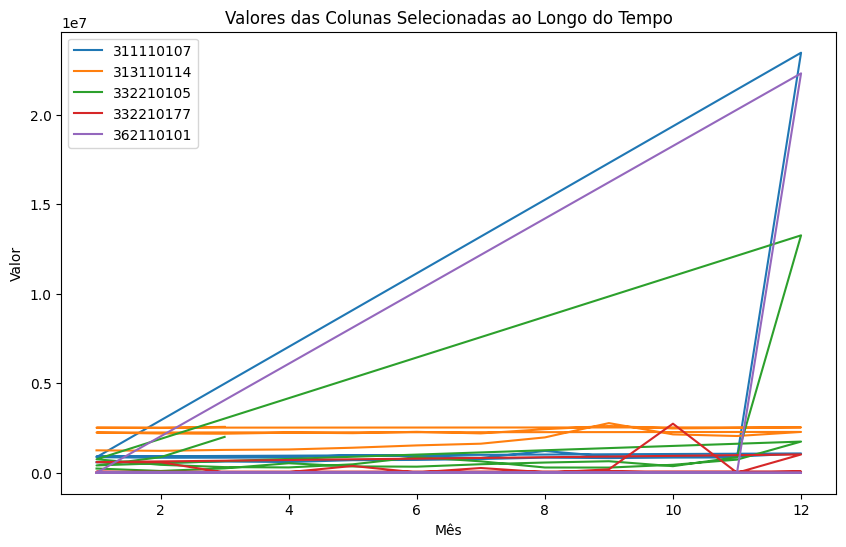

In [ ]:
# Visualizando as colunas selecionadas ao longo do tempo
plt.figure(figsize=(10, 6))
for column in selected_features:
    plt.plot(df['Mês'], df[column], label=column)

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Valores das Colunas Selecionadas ao Longo do Tempo')
plt.legend()
plt.show()


Análise da Visualização Temporal das Colunas Selecionadas

1. **Tendência de Crescimento**:
   - As colunas **311110107**, **313110114**, **332210105**, e **362110101** mostram uma tendência de crescimento ao longo dos meses. Isso pode indicar um aumento nas despesas nessas categorias específicas ao longo do tempo.

2. **Valores Constantes**:
   - A coluna **332210177** apresenta valores relativamente baixos e constantes durante a maior parte do período, com algumas flutuações esporádicas.

3. **Variação Significativa**:
   - As colunas **311110107** e **362110101** apresentam picos significativos nos meses finais, sugerindo um aumento nas despesas para essas categorias.

4. **Despesas Zero**:
   - Algumas colunas apresentam períodos com valores zero, indicando meses em que não houve despesas registradas para essas categorias específicas.

Conclusões Iniciais
- **Aumento Gradual nas Despesas**: A maioria das colunas mostra um aumento gradual nas despesas ao longo do tempo, com algumas apresentando picos significativos nos meses finais.
- **Flutuações e Valores Constantes**: Algumas colunas apresentam flutuações esporádicas ou valores constantes durante a maior parte do período.
- **Despesas Zero**: A presença de valores zero em algumas colunas pode indicar períodos sem despesas registradas ou dados faltantes.

Correlação com a Coluna Alvo

In [ ]:
# Calculando a correlação das colunas selecionadas com a coluna alvo
correlation_with_target = df[selected_features].corrwith(df['Total Mês'])
print(correlation_with_target)


311110107    0.944929
313110114    0.212068
332210105    0.933724
332210177    0.248592
362110101    0.942168
dtype: float64


Análise da Correlação com a Coluna Alvo 'Total Mês'

Relação entre as colunas selecionadas e a coluna alvo 'Total Mês':

1. **311110107**:
   - **Correlação**: 0.944929
   - Correlação muito alta com 'Total Mês', indicando uma relação linear forte e positiva. Pode ser uma das colunas mais importantes para prever o valor total das despesas mensais.

2. **313110114**:
   - **Correlação**: 0.212068
   - A correlação é baixa, sugerindo que esta coluna tem uma relação fraca com 'Total Mês'. Pode ser menos relevante para a previsão.

3. **332210105**:
   - **Correlação**: 0.933724
   - Esta coluna também apresenta uma correlação muito alta com 'Total Mês', indicando uma relação linear forte e positiva.

4. **332210177**:
   - **Correlação**: 0.248592
   - A correlação é baixa, indicando uma relação fraca com 'Total Mês'. Pode ser menos relevante para a previsão.

5. **362110101**:
   - **Correlação**: 0.942168
   - Esta coluna tem uma correlação muito alta com 'Total Mês', indicando uma relação linear forte e positiva.

Conclusões Iniciais
- **Alta Correlação**: As colunas **311110107**, **332210105**, e **362110101** são altamente correlacionadas com 'Total Mês' e são críticas para a previsão.
- **Baixa Correlação**: As colunas **313110114** e **332210177** têm uma correlação fraca com 'Total Mês' e podem ser menos relevantes para a previsão.